In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import cluster, tree

from sklearn.metrics import confusion_matrix
from sklearn.externals.six import StringIO

from sklearn.decomposition import FactorAnalysis

import pydot
import seaborn as sns

In [163]:
pd.set_option('display.width', 4000)
pd.set_option('max_colwidth', 4000)
pd.set_option('max_columns', 200)
pd.set_option('max_rows', 200)

In [164]:
os.chdir('/Users/Weiyang/Desktop/Morris Hitte Customer Insights')

In [165]:
dataset = pd.read_csv('not_engaged_customers_dataset_7_clusters.csv', low_memory = False)

In [166]:
dataset.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
0,2517,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,A,5,0,0,0,0,0,0,B,D,B,B,9,Y,E,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,C,C,NaN,U,U,U,Y,N,1,80,0,0,0,0,2
1,2522,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,U,S,M,D,4,0,0,0,0,0,0,W,C,B,B,9,Y,A,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,G,E,15.0,8,M,M,N,N,0,0,0,0,0,0,0
2,3526,0,0,0,0,0,0,0,0,0,0,U,0,C,1,U,0,U,0,S,O,S,M,F,1,1,0,0,0,1,0,A,E,C,C,7,Y,H,H,M,1,1,1,1,0,1,0,0,1,1,0,0,1,M,U,2,NJ,B,I,15.0,1,M,M,N,N,0,0,0,1,0,0,0
3,3529,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,O,S,M,F,1,0,0,0,0,0,0,W,C,C,C,3,Y,H,G,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,C,G,10.0,2,M,M,N,N,0,0,0,0,0,0,0
4,3531,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,F,3,0,0,0,0,0,0,W,E,C,C,6,N,G,G,M,0,0,1,1,0,1,1,0,0,0,0,0,0,M,H,2,NJ,H,F,15.0,U,M,M,N,N,0,0,0,0,0,0,6


In [167]:
dataset['Shopped_in_30_days'] = np.where(dataset['client_shopped_30_days'] == 0, dataset['comp1_shopped_30_days'], dataset['client_shopped_30_days'])
dataset['Shopped_in_30_days'] = np.where(dataset['Shopped_in_30_days'] == 0, dataset['comp2_shopped_30_days'], dataset['Shopped_in_30_days'])
dataset['Shopped_in_30_days'] = np.where(dataset['Shopped_in_30_days'] == 0, dataset['comp3_shopped_30_days'], dataset['Shopped_in_30_days'])

In [168]:
dataset['Shopped_in_30_days'].value_counts()

0    20054
1      483
Name: Shopped_in_30_days, dtype: int64

In [169]:
data_list = []
for row in dataset['Retail_Card']:
    if row == 'N' or row == 'U':
        data_list.append(0)
    else:
        data_list.append(1)
        
data_list = pd.DataFrame(data_list, columns = ['Has_Retail_Cards'])

dataset = pd.concat([data_list, dataset], axis = 1)
dataset = dataset.drop(['Retail_Card'], axis = 1)

In [171]:
result1 = dataset[dataset['Cluster'] == 1]

new_list = ['Shopped_in_30_days',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result1 = result1[new_list].reset_index()

result1 = result1.drop(['index'], axis = 1)

result1 = pd.get_dummies(result1)

result1.to_csv('not_engaged_cluster1_log_reg.csv', index = False)

In [172]:
result3 = dataset[dataset['Cluster'] == 3]

new_list = ['Shopped_in_30_days',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result3 = result3[new_list].reset_index()

result3 = result3.drop(['index'], axis = 1)

result3 = pd.get_dummies(result3)

result3.to_csv('not_engaged_cluster3_log_reg.csv', index = False)

In [173]:
result4 = dataset[dataset['Cluster'] == 4]

new_list = ['Shopped_in_30_days',
'Mail_Order_Buyer', 
'Mail_Ord_Clothes',
'Mail_Ord_Cosmetic',
'Mail_Ord_Gifts',
'Mail_Ord_Big_Clothes',
'Mail_Order_Response',
'Has_Retail_Cards']

result4 = result4[new_list].reset_index()

result4 = result4.drop(['index'], axis = 1)

result4 = pd.get_dummies(result4)

result4.to_csv('not_engaged_cluster4_log_reg.csv', index = False)

In [6]:
dataset['Loyalty'].value_counts()

0    20537
Name: Loyalty, dtype: int64

In [7]:
dataset['RFM_score'].value_counts()

0    20537
Name: RFM_score, dtype: int64

In [139]:
dataset['wc_num_items'].value_counts()

0    20231
C      220
A       43
B       43
Name: wc_num_items, dtype: int64

In [140]:
dataset['comp1_shopped_3_mos'].value_counts()

0    20310
1      227
Name: comp1_shopped_3_mos, dtype: int64

In [141]:
dataset['comp2_shopped_3_mos'].value_counts()

0    20377
1      160
Name: comp2_shopped_3_mos, dtype: int64

In [142]:
dataset['comp3_shopped_3_mos'].value_counts()

0    20356
1      181
Name: comp3_shopped_3_mos, dtype: int64

In [143]:
dataset['Mail_Order_Buyer'].value_counts()

M    11163
N     7878
Y      927
P      569
Name: Mail_Order_Buyer, dtype: int64

In [131]:
dataset['Cluster'].value_counts()

0    4762
2    4011
6    3240
1    2941
4    2086
5    1769
3    1728
Name: Cluster, dtype: int64

In [138]:
3240/20537

0.15776403564298583

In [8]:
dataset['wc_num_items'].value_counts()

0    20231
C      220
A       43
B       43
Name: wc_num_items, dtype: int64

### Factor Analysis

In [9]:
X = dataset.drop(['dataright_seq', 'Len_of_Residence', 'Loyalty', 'RFM_score', 'wc_bought_any', 'wc_num_items', 'wc_big_ticket_bought_any', 'wc_big_ticket_num_items', 'wc_low_ticket_bought_any', 'wc_low_ticket_num_items', 'wc_big_ticket_amt_spent', 'wc_low_ticket_amt_spent', 'client_times_shopped_30_days', 'client_shopped_3_mos', 'comp1_times_shopped_30_days', 'comp1_shopped_3_mos', 'comp2_times_shopped_30_days', 'comp2_shopped_3_mos', 'comp3_times_shopped_30_days', 'comp3_shopped_3_mos', 'Child_0_2', 'Child_3_5', 'Child_6_10', 'Child_11_15', 'Child_16_18', 'Mail_Ord_Books', 'Mail_Ord_BooksMags', 'Mail_Ord_Child_Prod', 'Mail_Ord_Clothes', 'Mail_Ord_Cosmetic', 'Mail_Ord_Food', 'Mail_Ord_Gifts', 'Mail_Ord_Furniture', 'Mail_Ord_Mags', 'Mail_Ord_Others', 'Mail_Ord_Jewel', 'Mail_Ord_Big_Clothes', 'Mail_Ord_DVD', 'client_shopped_30_days', 'comp1_shopped_30_days', 'comp2_shopped_30_days', 'comp3_shopped_30_days', 'Cluster'], axis = 1)

In [10]:
X = pd.get_dummies(X)

In [11]:
len(X.columns)

194

In [12]:
Y = dataset['wc_num_items']

In [13]:
factor = FactorAnalysis(n_components = 81, tol=1e-8, max_iter=10000, random_state = 777).fit(X)

In [14]:
results = pd.DataFrame(factor.components_, columns=X.columns)

### Decision Tree for each Cluster

In [15]:
cluster0 = dataset[dataset['Cluster'] == 0]

In [16]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [17]:
cluster0.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
1,2522,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,U,S,M,D,4,0,0,0,0,0,0,W,C,B,B,9,Y,A,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,G,E,15.0,8,M,M,N,N,0,0,0,0,0,0,0
2,3526,0,0,0,0,0,0,0,0,0,0,U,0,C,1,U,0,U,0,S,O,S,M,F,1,1,0,0,0,1,0,A,E,C,C,7,Y,H,H,M,1,1,1,1,0,1,0,0,1,1,0,0,1,M,U,2,NJ,B,I,15.0,1,M,M,N,N,0,0,0,1,0,0,0
3,3529,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,O,S,M,F,1,0,0,0,0,0,0,W,C,C,C,3,Y,H,G,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,C,G,10.0,2,M,M,N,N,0,0,0,0,0,0,0
8,5047,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,C,2,0,0,0,0,0,1,W,B,C,B,1,Y,F,E,M,0,1,0,0,0,0,1,0,0,1,0,0,0,M,U,U,NJ,B,F,15.0,U,M,M,Y,N,1,8,0,0,0,0,0
12,4804,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,O,S,F,C,1,0,0,0,0,0,0,U,C,B,A,6,Y,C,F,M,1,1,0,1,0,1,0,0,1,0,0,0,0,M,B,1,NJ,C,G,1.0,16,M,M,N,N,0,0,0,0,0,0,0


In [18]:
cluster0 = cluster0[test_list]

In [19]:
dummies = pd.get_dummies(cluster0.iloc[:,1:])

In [20]:
cluster0 = pd.concat([cluster0['wc_num_items'],dummies],axis = 1)

In [21]:
data_list = list(cluster0.columns)[1:]

In [22]:
tree_train, tree_test = train_test_split(cluster0, test_size=0.33, random_state=777)

In [23]:
cluster0.shape

(4762, 52)

In [24]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=10, min_samples_leaf = 20)

In [25]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [26]:
test_preds = clf.predict(tree_test[data_list])

In [27]:
clf.predict_proba(tree_test[data_list])

array([[9.93399340e-01, 1.88590288e-03, 4.71475719e-04, 4.24328147e-03],
       [9.93399340e-01, 1.88590288e-03, 4.71475719e-04, 4.24328147e-03],
       [9.93399340e-01, 1.88590288e-03, 4.71475719e-04, 4.24328147e-03],
       ...,
       [9.93399340e-01, 1.88590288e-03, 4.71475719e-04, 4.24328147e-03],
       [9.64912281e-01, 1.75438596e-02, 0.00000000e+00, 1.75438596e-02],
       [9.93399340e-01, 1.88590288e-03, 4.71475719e-04, 4.24328147e-03]])

In [28]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [29]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

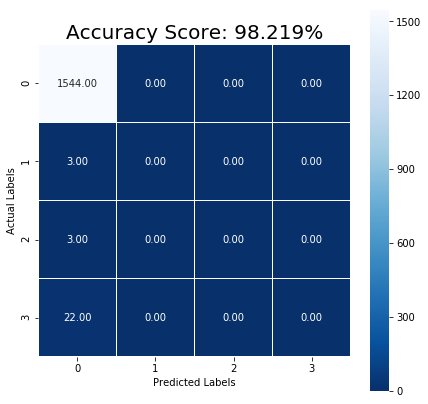

In [30]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [31]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("not_engaged_customers_cluster0_tree.pdf")

### Decision Tree for Cluster 1

In [32]:
cluster1 = dataset[dataset['Cluster'] == 1]

In [33]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [34]:
cluster1.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
17,4810,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,G,2,0,0,0,0,0,0,W,B,B,A,2,N,F,C,M,0,1,1,1,0,0,1,0,1,0,0,1,0,M,G,1,NJ,C,A,14.0,U,M,U,N,N,0,0,0,0,0,0,1
18,4811,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,G,3,1,0,0,0,0,1,W,B,B,A,4,N,E,F,N,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,1,NJ,B,F,5.0,5,M,M,N,N,0,0,0,0,0,0,1
19,4813,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,G,3,0,0,0,0,0,0,W,C,B,A,6,N,E,G,M,1,1,1,1,1,0,1,0,1,0,0,0,0,M,H,1,NJ,B,H,6.0,U,M,M,N,N,0,0,0,0,0,0,1
20,3015,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,O,S,F,G,1,0,0,0,0,0,0,W,B,B,A,3,Y,D,B,Y,0,0,0,0,0,0,0,0,0,0,0,0,0,Y,Q,1,NJ,B,A,15.0,16,M,M,N,N,0,0,0,0,0,0,1
29,5970,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,O,S,F,D,2,0,0,0,0,0,0,H,C,B,A,8,Y,A,D,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,1,NY,B,B,15.0,6,M,M,N,N,0,0,0,0,0,0,1


In [35]:
cluster1 = cluster1[test_list]

In [36]:
dummies = pd.get_dummies(cluster1.iloc[:,1:])

In [37]:
cluster1 = pd.concat([cluster1['wc_num_items'],dummies],axis = 1)

In [38]:
data_list = list(cluster1.columns)[1:]

In [39]:
tree_train, tree_test = train_test_split(cluster1, test_size=0.33, random_state=777)

In [40]:
cluster1.shape

(2941, 51)

In [41]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [42]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [43]:
test_preds = clf.predict(tree_test[data_list])

In [44]:
clf.predict_proba(tree_test[data_list])

array([[9.92005814e-01, 7.26744186e-04, 2.18023256e-03, 5.08720930e-03],
       [9.92005814e-01, 7.26744186e-04, 2.18023256e-03, 5.08720930e-03],
       [9.92005814e-01, 7.26744186e-04, 2.18023256e-03, 5.08720930e-03],
       ...,
       [9.92005814e-01, 7.26744186e-04, 2.18023256e-03, 5.08720930e-03],
       [9.93377483e-01, 0.00000000e+00, 0.00000000e+00, 6.62251656e-03],
       [9.92005814e-01, 7.26744186e-04, 2.18023256e-03, 5.08720930e-03]])

In [45]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [46]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

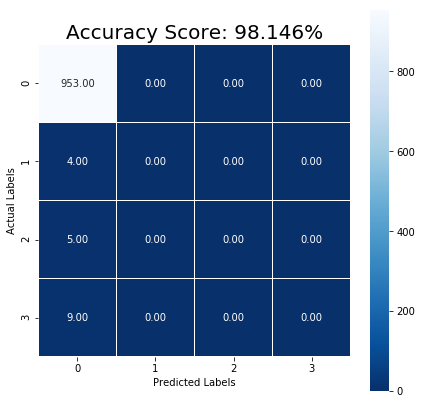

In [47]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [48]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("not_engaged_customers_cluster1_tree.pdf")

### Decision Tree for Cluster 2

In [49]:
cluster2 = dataset[dataset['Cluster'] == 2]

In [50]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [51]:
cluster2.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
0,2517,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,A,5,0,0,0,0,0,0,B,D,B,B,9,Y,E,E,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,CT,C,C,NaN,U,U,U,Y,N,1,80,0,0,0,0,2
5,3231,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,R,M,F,D,1,0,0,0,1,0,0,B,B,B,A,4,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,NJ,B,A,2.0,U,U,M,N,N,0,0,0,0,0,0,2
6,3174,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,R,S,M,D,1,0,0,0,0,0,0,W,B,B,A,4,Y,G,F,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,1,NJ,B,D,3.0,U,U,U,N,N,0,0,0,0,0,0,2
7,5044,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,U,S,M,B,2,1,0,1,0,0,0,W,B,C,B,0,Y,A,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,U,U,NJ,E,A,15.0,U,Y,M,N,N,0,0,0,0,0,0,2
9,5049,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,U,S,F,C,1,0,0,0,0,0,0,U,B,C,B,2,Y,E,A,N,0,0,0,0,0,0,0,0,0,0,0,0,0,N,Q,U,NJ,F,A,4.0,U,U,M,N,N,0,0,0,0,0,0,2


In [52]:
cluster2 = cluster2[test_list]

In [53]:
dummies = pd.get_dummies(cluster2.iloc[:,1:])

In [54]:
cluster2 = pd.concat([cluster2['wc_num_items'],dummies],axis = 1)

In [55]:
data_list = list(cluster2.columns)[1:]

In [56]:
tree_train, tree_test = train_test_split(cluster2, test_size=0.33, random_state=777)

In [57]:
cluster2.shape

(4011, 52)

In [58]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [59]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [60]:
test_preds = clf.predict(tree_test[data_list])

In [61]:
clf.predict_proba(tree_test[data_list])

array([[0.98666667, 0.        , 0.        , 0.01333333],
       [0.98219414, 0.0034463 , 0.00229753, 0.01206203],
       [0.98219414, 0.0034463 , 0.00229753, 0.01206203],
       ...,
       [0.96470588, 0.00470588, 0.00470588, 0.02588235],
       [0.98219414, 0.0034463 , 0.00229753, 0.01206203],
       [0.96470588, 0.00470588, 0.00470588, 0.02588235]])

In [62]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [63]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

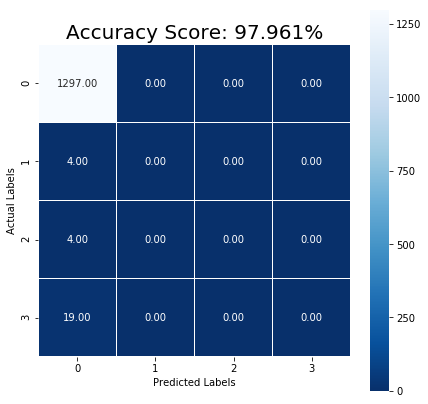

In [64]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [65]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("not_engaged_customers_cluster2_tree.pdf")

### Decision Tree for Cluster 3

In [66]:
cluster3 = dataset[dataset['Cluster'] == 3]

In [67]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [68]:
cluster3.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
85,2545,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,O,S,M,B,2,3,0,0,0,1,1,W,E,D,D,4,Y,G,E,M,0,1,0,1,1,0,0,1,1,1,0,0,0,M,U,U,CT,G,C,14.0,17,M,M,N,N,0,0,0,0,0,0,3
98,3754,0,0,0,0,0,0,0,0,0,0,U,0,C,1,U,0,A,1,S,O,S,F,A,2,0,0,0,0,0,0,A,G,D,D,9,Y,G,F,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NJ,I,F,3.0,U,M,U,N,N,0,0,0,1,0,1,3
99,3755,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,C,2,1,0,0,1,0,0,W,G,D,D,9,N,G,F,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,U,NJ,I,F,3.0,U,M,U,N,N,1,76,0,0,0,0,3
100,3756,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,D,2,7,0,0,1,1,1,W,H,D,D,9,Y,G,F,M,0,1,1,1,0,0,1,1,1,1,0,0,1,M,G,U,NJ,I,G,12.0,8,M,M,Y,N,7,431,0,0,0,0,3
101,3757,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,C,5,3,1,0,0,1,1,H,D,D,D,4,Y,G,F,M,0,1,0,1,0,0,1,0,1,1,0,0,0,M,U,U,NJ,I,F,12.0,7,M,M,N,N,0,0,0,0,0,0,3


In [69]:
cluster3 = cluster3[test_list]

In [70]:
dummies = pd.get_dummies(cluster3.iloc[:,1:])

In [71]:
cluster3 = pd.concat([cluster3['wc_num_items'],dummies],axis = 1)

In [72]:
data_list = list(cluster3.columns)[1:]

In [73]:
tree_train, tree_test = train_test_split(cluster3, test_size=0.33, random_state=777)

In [74]:
cluster3.shape

(1728, 51)

In [75]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [76]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [77]:
test_preds = clf.predict(tree_test[data_list])

In [78]:
clf.predict_proba(tree_test[data_list])

array([[0.9988345 , 0.        , 0.0011655 ],
       [0.96226415, 0.01886792, 0.01886792],
       [0.9988345 , 0.        , 0.0011655 ],
       ...,
       [0.9988345 , 0.        , 0.0011655 ],
       [0.9988345 , 0.        , 0.0011655 ],
       [0.9988345 , 0.        , 0.0011655 ]])

In [79]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [80]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

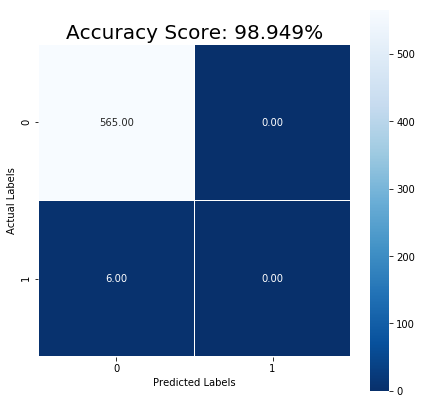

In [81]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [82]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("not_engaged_customers_cluster3_tree.pdf")

### Decision Tree for Cluster 4

In [83]:
cluster4 = dataset[dataset['Cluster'] == 4]

In [84]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [85]:
cluster4.head()

,dataright_seq,Loyalty,RFM_score,wc_bought_any,wc_num_items,wc_big_ticket_bought_any,wc_big_ticket_num_items,wc_low_ticket_bought_any,wc_low_ticket_num_items,wc_big_ticket_amt_spent,wc_low_ticket_amt_spent,client_times_shopped_30_days,client_shopped_3_mos,comp1_times_shopped_30_days,comp1_shopped_3_mos,comp2_times_shopped_30_days,comp2_shopped_3_mos,comp3_times_shopped_30_days,comp3_shopped_3_mos,Marital_Status,Homeowner_Status,Dwelling_Type,Gender,Age,Num_Adults,Num_Children,Child_0_2,Child_3_5,Child_6_10,Child_11_15,Child_16_18,Race,HH_Income,Eff_Income,Socioeconomic_Score,ZIP_Income,Dual_Income,Home_Market_Value,Net_Worth,Mail_Order_Buyer,Mail_Ord_Books,Mail_Ord_BooksMags,Mail_Ord_Child_Prod,Mail_Ord_Clothes,Mail_Ord_Cosmetic,Mail_Ord_Food,Mail_Ord_Gifts,Mail_Ord_Furniture,Mail_Ord_Mags,Mail_Ord_Others,Mail_Ord_Jewel,Mail_Ord_Big_Clothes,Mail_Ord_DVD,Mail_Order_Response,Occupation,Education,State,Est_HH_Debt_Level,Est_HH_Invest_Asset,Len_of_Residence,Bank_Card_New_Issue_Year,Bank_Card,Retail_Card,Buyer_Retail_Last_Order_2yrs,Buyer_Retail_Last_Order_1yrs,Buyer_Reatil_Last_Order_Quantity,Buyer_Reatil_Last_Order_Dollars,client_shopped_30_days,comp1_shopped_30_days,comp2_shopped_30_days,comp3_shopped_30_days,Cluster
48,7794,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,E,5,1,0,0,0,1,0,W,F,E,D,5,N,I,G,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NY,E,G,2.0,17,M,M,N,N,1,36,0,0,0,0,4
88,3440,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,G,2,0,0,0,0,0,0,W,H,D,D,8,N,I,H,M,1,1,0,1,0,0,0,0,1,0,0,1,0,M,U,2,NJ,C,J,12.0,17,M,M,N,N,1,113,0,0,0,0,4
89,3443,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,S,O,S,M,A,3,1,0,0,0,1,0,W,H,D,D,9,N,I,G,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,I,G,15.0,6,M,M,N,N,3,481,0,0,0,0,4
94,4554,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,F,2,0,0,0,0,0,0,W,F,C,C,8,N,I,H,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,U,2,NJ,B,I,15.0,U,M,M,N,N,0,0,0,0,0,0,4
144,7795,0,0,0,0,0,0,0,0,0,0,U,0,U,0,U,0,U,0,M,O,S,M,D,2,4,0,0,1,1,0,W,H,C,D,8,N,I,H,M,0,0,0,0,0,0,0,0,0,0,0,0,0,M,D,U,NY,G,H,13.0,U,M,M,Y,N,17,2517,0,0,0,0,4


In [86]:
cluster4 = cluster4[test_list]

In [87]:
dummies = pd.get_dummies(cluster4.iloc[:,1:])

In [88]:
cluster4 = pd.concat([cluster4['wc_num_items'],dummies],axis = 1)

In [89]:
data_list = list(cluster4.columns)[1:]

In [90]:
tree_train, tree_test = train_test_split(cluster4, test_size=0.33, random_state=777)

In [91]:
cluster4.shape

(2086, 51)

In [92]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [93]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [94]:
test_preds = clf.predict(tree_test[data_list])

In [95]:
clf.predict_proba(tree_test[data_list])

array([[0.99354839, 0.00645161, 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        ],
       [0.91489362, 0.        , 0.        , 0.08510638],
       ...,
       [1.        , 0.        , 0.        , 0.        ],
       [0.9921466 , 0.        , 0.        , 0.0078534 ],
       [0.9921466 , 0.        , 0.        , 0.0078534 ]])

In [96]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [97]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

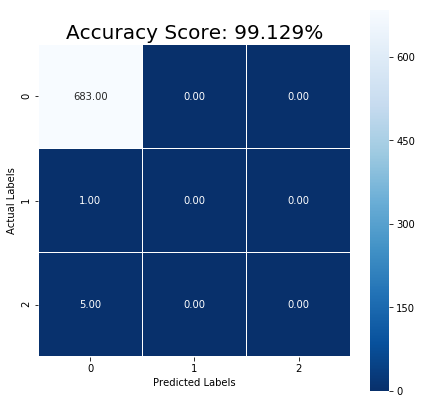

In [98]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [99]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("not_engaged_customers_cluster4_tree.pdf")

### Decision Tree for Cluster 5

In [100]:
cluster5 = dataset[dataset['Cluster'] == 5]

In [101]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [102]:
cluster5 = cluster5[test_list]

In [103]:
dummies = pd.get_dummies(cluster5.iloc[:,1:])

In [104]:
cluster5 = pd.concat([cluster5['wc_num_items'],dummies],axis = 1)

In [105]:
data_list = list(cluster5.columns)[1:]

In [106]:
tree_train, tree_test = train_test_split(cluster5, test_size=0.33, random_state=777)

In [107]:
cluster5.shape

(1769, 52)

In [108]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [109]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [110]:
test_preds = clf.predict(tree_test[data_list])

In [111]:
clf.predict_proba(tree_test[data_list])

array([[0.9945593 , 0.        , 0.00108814, 0.00435256],
       [0.9945593 , 0.        , 0.00108814, 0.00435256],
       [0.9945593 , 0.        , 0.00108814, 0.00435256],
       ...,
       [0.9945593 , 0.        , 0.00108814, 0.00435256],
       [0.9945593 , 0.        , 0.00108814, 0.00435256],
       [0.9945593 , 0.        , 0.00108814, 0.00435256]])

In [112]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [113]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

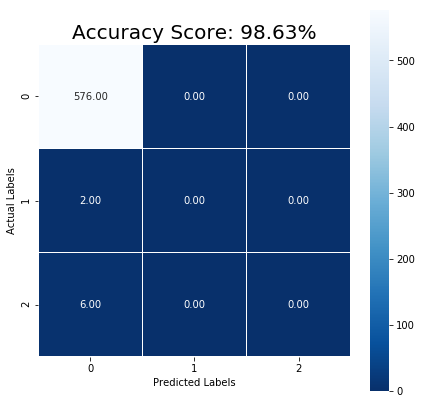

In [114]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [115]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("not_engaged_customers_cluster5_tree.pdf")

### Decision Tree for Cluster 6

In [116]:
cluster6 = dataset[dataset['Cluster'] == 6]

In [117]:
test_list = ['wc_num_items', 'Num_Adults', 'Num_Children', 'ZIP_Income', 'Buyer_Reatil_Last_Order_Quantity', 'Buyer_Reatil_Last_Order_Dollars', 'Marital_Status', 'Homeowner_Status', 'Dwelling_Type', 'HH_Income', 'Dual_Income', 'Home_Market_Value', 'Net_Worth', 'Mail_Order_Buyer', 'Mail_Order_Response', 'Buyer_Retail_Last_Order_2yrs']

In [118]:
cluster6 = cluster6[test_list]

In [119]:
dummies = pd.get_dummies(cluster6.iloc[:,1:])

In [120]:
cluster6 = pd.concat([cluster6['wc_num_items'],dummies],axis = 1)

In [121]:
data_list = list(cluster6.columns)[1:]

In [122]:
tree_train, tree_test = train_test_split(cluster6, test_size=0.33, random_state=777)

In [123]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=7, min_samples_leaf = 30)

In [124]:
clf = clf.fit(tree_train[data_list], tree_train['wc_num_items'])

In [125]:
test_preds = clf.predict(tree_test[data_list])

In [126]:
clf.predict_proba(tree_test[data_list])

array([[9.87577640e-01, 4.14078675e-03, 0.00000000e+00, 8.28157350e-03],
       [9.87577640e-01, 4.14078675e-03, 0.00000000e+00, 8.28157350e-03],
       [9.87577640e-01, 4.14078675e-03, 0.00000000e+00, 8.28157350e-03],
       ...,
       [9.94152047e-01, 2.92397661e-03, 2.92397661e-03, 0.00000000e+00],
       [9.90654206e-01, 0.00000000e+00, 8.49617672e-04, 8.49617672e-03],
       [9.90654206e-01, 0.00000000e+00, 8.49617672e-04, 8.49617672e-03]])

In [127]:
score = clf.score(tree_test[data_list], tree_test['wc_num_items'])

#### Creating confusion matrix

In [128]:
cm = confusion_matrix(tree_test['wc_num_items'], test_preds)

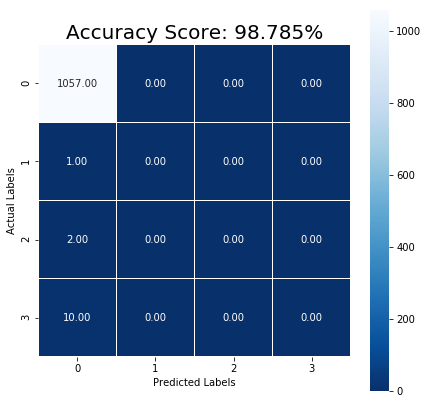

In [129]:
plt.figure(figsize = (7,7))

sns.heatmap(cm, annot = True, fmt = '.2f', linewidths = .5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual Labels');
plt.xlabel('Predicted Labels');
all_sample_title = 'Accuracy Score: {0}%'.format(round(score*100,3))
plt.title(all_sample_title, size = 20);

plt.show()

#### Visualizing decision tree

In [130]:
dot_data = StringIO()

tree.export_graphviz(clf, out_file=dot_data, feature_names = data_list, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph[0].write_pdf("not_engaged_customers_cluster6_tree.pdf")